# Time series


La libreria `siphon` viene con un servicio de consulta especializado para series temporales.

In [1]:
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
from netCDF4 import num2date

from siphon.catalog import TDSCatalog

In [2]:
from grpc import services
from siphon import catalog

catalog.CompoundService()

TypeError: __init__() missing 1 required positional argument: 'service_node'

In [3]:
best_gfs = TDSCatalog('http://thredds.ucar.edu/thredds/catalog/grib/NCEP/GFS/'
                      'Global_0p5deg/catalog.xml?dataset=grib/NCEP/GFS/Global_0p5deg/Best')
print(best_gfs.datasets)

['Best GFS Half Degree Forecast Time Series']


In [4]:
best_ds = best_gfs.datasets[0]
ncss =best_ds.subset()

In [5]:
query = ncss.query()

In [6]:
now = datetime.utcnow()
query.lonlat_point(-20,-40).vertical_level(100000).time_range(now, now+timedelta(days=7))
query.variables('Temperature_isobaric').accept('netcdf')

var=Temperature_isobaric&time_start=2022-10-22T20%3A03%3A52.641557&time_end=2022-10-29T20%3A03%3A52.641557&longitude=-20&latitude=-40&vertCoord=100000&accept=netcdf

In [7]:
data = ncss.get_data(query)
list(data.variables)

['latitude',
 'longitude',
 'stationAltitude',
 'station_id',
 'station_description',
 'time',
 'stationIndex',
 'Temperature_isobaric']

In [8]:
temp = data.variables['Temperature_isobaric']
time = data.variables['time']

In [9]:
time_vals = num2date(time[:].squeeze(), time.units, only_use_cftime_datetimes=False)
print(time_vals[:5])

[real_datetime(2022, 10, 22, 21, 0) real_datetime(2022, 10, 23, 0, 0)
 real_datetime(2022, 10, 23, 3, 0) real_datetime(2022, 10, 23, 6, 0)
 real_datetime(2022, 10, 23, 9, 0)]


In [10]:
help(num2date)
temp.units
temp.name

Help on built-in function num2date in module cftime._cftime:

num2date(...)
    num2date(times, units, calendar=u'standard', only_use_cftime_datetimes=True, only_use_python_datetimes=False, has_year_zero=None)
    
    Return datetime objects given numeric time values. The units
    of the numeric time values are described by the **units** argument
    and the **calendar** keyword. The returned datetime objects represent
    UTC with no time-zone offset, even if the specified
    **units** contain a time-zone offset.
    
    **times**: numeric time values.
    
    **units**: a string of the form **<time units> since <reference time>**
    describing the time units. **<time units>** can be days, hours, minutes,
    seconds, milliseconds or microseconds. **<reference time>** is the time
    origin. **months since** is allowed *only* for the **360_day** calendar
    and **common_years since** is allowed *only* for the **365_day** calendar.
    
    **calendar**: describes the calendar u

'Temperature_isobaric'

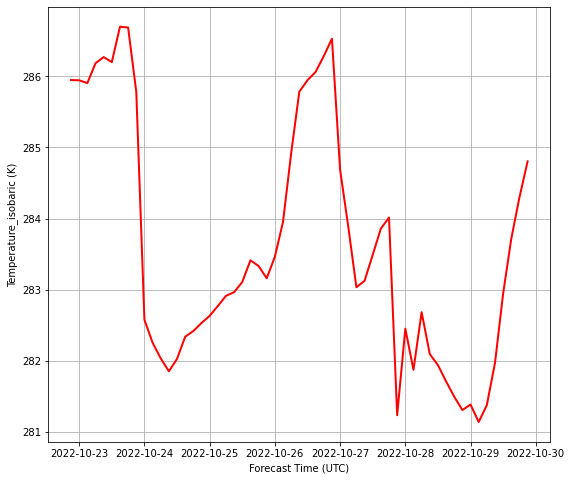

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(9, 8))
ax.plot(time_vals, temp[:].squeeze(), 'r', linewidth=2)
ax.set_ylabel(f'{temp.name} ({temp.units})')
ax.set_xlabel('Forecast Time (UTC)')
ax.grid(True)